<a href="https://colab.research.google.com/github/cabamarcos/TAA_3/blob/main/Actividad_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

_Técnicas de Aprendizaje Automático_

_Máster Universitario en Inteligencia Artificial_

# Caso Grupal: Clasificación de mensajes de odio

## Objetivos

Mediante este trabajo se pretende que el estudiante ponga en práctica la aplicación de un proceso completo de machine learning a la clasificación de mensajes de odio.

El objetivo es generar un proyecto completo de machine learning para clasificar mensajes de odio. Debe detallar los pasos que hay que realizar para la clasificación de mensajes, así como una evaluación de los resultados.

- Decidir la técnica de aprendizaje automático a utilizar
- Analizar diferentes modelos de aprendizaje supervisado para la clasificación de mensajes de odio.
- Evaluar los resultados obtenidos por cada modelo en términos de precisión, recall, y f1.

## Descripción de la actividad

La empresa SureTech Innovations quiere implementar un clasificador de mensajes de odio. Para ello se deben entrenar diferentes modelos de clasificación, evaluar el rendimiento de cada uno de ellos, y finalmente, decidir cuál sería el mejor.

Para llevar a cabo esta actividad cuentas con el dataset simplificado de HateSpeech en la siguiente URL: https://github.com/almudenaris/TAA/blob/main/out.csv

Los pasos que se deben seguir para desarrollar esta actividad son:

1.	¿Qué tarea de aprendizaje automático se pretende resolver? ¿Qué análisis previos serían necesarios realizar para saber si es posible construir el modelo que buscamos? Realiza un análisis exploratorio de datos adecuado a la tarea que se pretende resolver y al dataset facilitado. Explica con detalle, en base a la tarea que se quiere resolver, qué análisis serían necesarios realizar sobre los datos.

2.	En base a la tarea que se pide realizar y a las características del dataset decide qué algoritmo o algoritmos se deben utilizar. Implementa tres modelos. Realiza los entrenamientos necesarios para cada uno de ellos. Explica por qué son convenientes los algoritmos elegidos.

3.	Realiza una explicación de las métricas de evaluación que se deben utilizar para valorar la bondad del modelo. Justifica la decisión de las elegidas. ¿Cómo habría que evaluar el modelo? Evalúa los modelos entrenados en el punto anterior y explica los resultados obtenidos.


## Dataset

El dataset original proporcionado en el proyecto transversal ha sido adaptado para la realización de esta actividad. Esa adaptación ha incluido:

- Eliminación de nulos y duplicados
- Eliminación de URLs, emojis y menciones a los periódicos
- Eliminación de filas vacías
- Limpieza y homogeneización de datos.
    - Convertir la totalidad del texto a minúscula
    - Eliminar signos de puntuación
    - Eliminar números
    - Eliminar espacios en blanco adicionales
    - Eliminar palabras con longitud menor a 2 caracteres
    - Eliminar stopwords
    - Tokenización
    - Lematización
- Proceso de extracción de características
    - Conteo de palabras positivas (A)
    - Conteo de palabras negativas (B)
    - Conteo del número de bigrams más comunes (C)
    - Conteo del número de menciones a otros usuarios (D)
    - Categoría del sentimiento según librería ‘pysentimiento’ en español (E)

- Estandarización de las características (A_t,..E_t)
- Combinación de características f1*fi (iA..iE) (Valor1,..Valor10).

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## EDA

In [30]:
# cargar dataset
df = pd.read_csv("out.csv")

# mostrar el número de filas
print("Número de filas: ", len(df))

Número de filas:  10000


In [31]:
df = df.drop_duplicates(subset=['comentario'], keep='first')
print(f"Filas sin duplicados: {len(df)}")

Filas sin duplicados: 9461


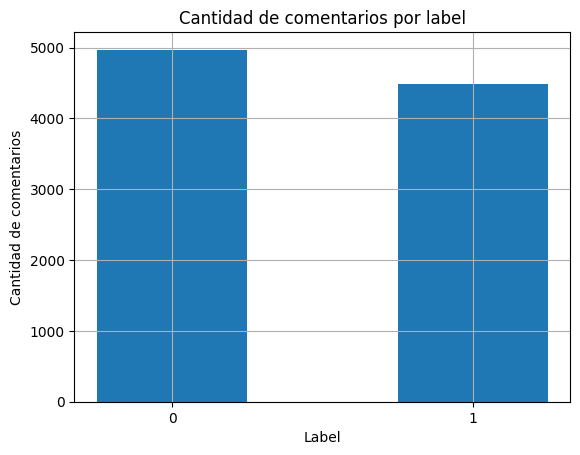

In [32]:
df['label'].hist(bins=[-0.25, 0.25, 0.75, 1.25])
plt.title('Cantidad de comentarios por label')
plt.xlabel('Label')
plt.ylabel('Cantidad de comentarios')
plt.xticks([0, 1])
plt.show()

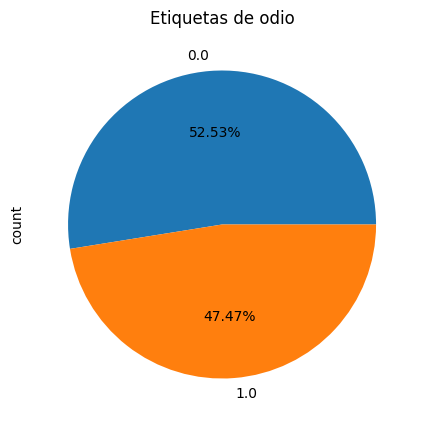

In [33]:
df['label'].value_counts().plot(kind='pie', title="Etiquetas de odio", autopct='%1.2f%%', figsize=(5,5))
plt.show()

In [34]:
df.head(10)

,A,B,C,D,E,comentario,label,A_t,B_t,C_t,...,Valor_1,Valor_2,Valor_3,Valor_4,Valor_5,Valor_6,Valor_7,Valor_8,Valor_9,Valor_10
0,2,64,30,0,2,"pandemia,originado,covid,cierto,incidencia,aba...",0.0,1.851102,2.759647,7.145831,...,5.108388,13.227660,-0.771127,0.815665,19.719970,-1.149606,1.216004,-2.976790,3.148722,-0.183560
1,4,70,21,0,0,"ser,mes,larga,espera,llegar,momento,siempre,pr...",0.0,3.990202,3.054765,4.877255,...,12.189130,19.461233,-1.662227,-2.119191,14.898871,-1.272546,-1.622382,-2.031754,-2.590305,0.221244
2,4,88,50,0,0,"cartagena,san,sebastiar,fuengirola,irun,orense...",0.0,3.990202,3.940120,12.187108,...,15.721875,48.629021,-1.662227,-2.119191,48.018675,-1.641365,-2.092593,-5.076872,-6.472559,0.221244
3,3,38,21,0,0,"pleno,dia,verano,calor,plan,mas,apetecibl,disf...",0.0,2.920652,1.480801,4.877255,...,4.324903,14.244765,-1.216677,-1.551155,7.222244,-0.616868,-0.786452,-2.031754,-2.590305,0.221244
4,0,59,17,0,0,"pasado,junio,celebro,dia,luchar,frente,leishma...",0.0,-0.287998,2.513715,3.869000,...,-0.723945,-1.114264,0.119973,0.152955,9.725563,-1.047156,-1.335031,-1.611737,-2.054821,0.221244
5,0,3,1,0,0,"llegadar,vacación,ser,sinonimo,dejadez,olvidar...",0.0,-0.287998,-0.240723,-0.164022,...,0.069328,0.047238,0.119973,0.152955,0.039484,0.100280,0.127848,0.068328,0.087112,0.221244
6,7,50,6,0,0,"hacer,año,demandar,cirugia,estetico,masculino,...",0.0,7.198852,2.071037,1.096297,...,14.909091,7.892080,-2.998878,-3.823302,2.270472,-0.862747,-1.099926,-0.456692,-0.582242,0.221244
7,0,40,5,0,0,"tono,ligeramente,bronceado,piel,aspecto,mas,at...",0.0,-0.287998,1.579174,0.844233,...,-0.454799,-0.243137,0.119973,0.152955,1.333191,-0.657848,-0.838697,-0.351688,-0.448371,0.221244
8,4,17,1,0,0,"tradicionalmente,mundo,cosmetico,dirigido,muje...",0.0,3.990202,0.447887,-0.164022,...,1.787158,-0.654482,-1.662227,-2.119191,-0.073463,-0.186579,-0.237872,0.068328,0.087112,0.221244
9,2,64,12,0,0,"edad,cronologico,aparecer,dni,ser,mismo,edad,b...",0.0,1.851102,2.759647,2.608680,...,5.108388,4.828933,-0.771127,-0.983118,7.199037,-1.149606,-1.465645,-1.086717,-1.385467,0.221244


In [35]:
from scipy.stats import chi2_contingency

# Seleccionamos las variabels independientes

variables_independientes = ['A_t', 'B_t', 'C_t', 'D_t', 'E_t']

for variable in variables_independientes:
    # Las variables deben ser convertidas a categoricas discreta para el conteo de la frecuencia, elemento fundamental en el test chi2
    df[f"{variable}_binned"] = pd.cut(df[variable], bins=5, labels=False)

    # Creacion de tabla de contingencia, esta tabla muestra la frecuencia con la que ocurren las combinaciones de categorías entre ambas variables
    contingency_table = pd.crosstab(df[f"{variable}_binned"], df['label'])

    # Prueba de Chi2
    chi2, p_value, dof, expected = chi2_contingency(contingency_table)
    print(f"{variable}: Chi²= {chi2:.3f}")

A_t: Chi²= 426.460
B_t: Chi²= 1478.348
C_t: Chi²= 645.906
D_t: Chi²= 60.830
E_t: Chi²= 5309.415


In [36]:
from scipy.stats import chi2_contingency

# Seleccionamos las variabels independientes

variables_independientes = ['Valor_1',	'Valor_2', 'Valor_3', 'Valor_4', 'Valor_5',	'Valor_6', 'Valor_7', 'Valor_8', 'Valor_9', 'Valor_10']

for variable in variables_independientes:
    # Las variables deben ser convertidas a categoricas discreta para el conteo de la frecuencia, elemento fundamental en el test chi2
    df[f"{variable}_binned"] = pd.cut(df[variable], bins=5, labels=False)

    # Creacion de tabla de contingencia, esta tabla muestra la frecuencia con la que ocurren las combinaciones de categorías entre ambas variables
    contingency_table = pd.crosstab(df[f"{variable}_binned"], df['label'])

    # Prueba de Chi2
    chi2, p_value, dof, expected = chi2_contingency(contingency_table)
    print(f"{variable}: Chi²= {chi2:.3f}")

Valor_1: Chi²= 29.014
Valor_2: Chi²= 89.482
Valor_3: Chi²= 82.886
Valor_4: Chi²= 172.826
Valor_5: Chi²= 38.121
Valor_6: Chi²= 1217.510
Valor_7: Chi²= 191.218
Valor_8: Chi²= 652.687
Valor_9: Chi²= 106.413
Valor_10: Chi²= 397.764


In [37]:
from sklearn.model_selection import train_test_split

# Quitamos las filas que no usaremos para el entrenamiento
df_entrenamiento = df.drop(columns=['A', 'B', 'C', 'D', 'E', 'comentario'])

# Guardar csv
df_entrenamiento.to_csv("out2.csv", index=False)

X = df_entrenamiento.drop(['label'],axis=1)
Y = df_entrenamiento['label']
X_train,X_test,y_train,y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

## SELECCIÓN Y ENTRENAMIENTO DE LOS MODELOS

### Bayes

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score

# Crear el clasificador Naïve Bayes
nb_classifier = GaussianNB()

# Entrenar el modelo
nb_classifier.fit(X_train, y_train)

GaussianNB()

### Random Forest

In [41]:
from sklearn.ensemble import RandomForestClassifier

n_arboles = [5, 10, 20, 50, 100]
particion = "gini"
max_depth = 10
min_samples_split = 10
min_samples_leaf = 2
max_feature = None

randomForest = [RandomForestClassifier(n_estimators = i, criterion = particion,
                                       max_depth = max_depth, min_samples_split = min_samples_split,
                                      min_samples_leaf = min_samples_leaf, max_features = None) for i in n_arboles]


In [42]:
rf_fit = [modelo_rf.fit(X_train,y_train) for modelo_rf in randomForest]

### SVM

In [45]:
from sklearn.svm import SVC

C = [0.1, 1, 10, 100, 1000]
kernel = 'rbf'
gamma = 'scale'

svc = [SVC(C=i, kernel=kernel, gamma=gamma) for i in C]
y_predictions_SVC_train = []
y_predictions_SVC_test = []
y_predictions_SVC_test_best = []

print(svc)

[SVC(C=0.1), SVC(C=1), SVC(C=10), SVC(C=100), SVC(C=1000)]


In [46]:
for i in range(len(svc)):
    svc[i].fit(X_train, y_train)

## EVALUACIÓN DE LOS MODELOS Y COMPARATIVA

### Bayes

In [39]:
# Hacer predicciones
y_pred = nb_classifier.predict(X_test)

# Evaluar precisión
accuracy = accuracy_score(y_test, y_pred)
print(f'Precisión del modelo: {accuracy:.2f}')

Precisión del modelo: 0.89


In [40]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.99      0.79      0.88       984
         1.0       0.81      1.00      0.90       909

    accuracy                           0.89      1893
   macro avg       0.90      0.89      0.89      1893
weighted avg       0.91      0.89      0.89      1893



In [49]:
X_pred = nb_classifier.predict(X_train)

accuracy = accuracy_score(y_train, X_pred)
print(f'Precisión del modelo: {accuracy:.2f}')

Precisión del modelo: 0.89


In [50]:
print(classification_report(y_train, X_pred))

              precision    recall  f1-score   support

         0.0       0.99      0.79      0.88      3986
         1.0       0.81      0.99      0.89      3582

    accuracy                           0.89      7568
   macro avg       0.90      0.89      0.89      7568
weighted avg       0.91      0.89      0.89      7568



### Random Forest

In [43]:
print('Acurracy con los datos de entrenamiento')
for modelo, arboles in zip(rf_fit, n_arboles):
    print(f"Modelo con número de árboles={arboles}: {modelo.score(X_train, y_train)}")

Acurracy con los datos de entrenamiento
Modelo con número de árboles=5: 0.983747357293869
Modelo con número de árboles=10: 0.9841437632135307
Modelo con número de árboles=20: 0.9842758985200846
Modelo con número de árboles=50: 0.9842758985200846
Modelo con número de árboles=100: 0.9842758985200846


In [51]:
print('Acurracy con los datos de entrenamiento')
for modelo, arboles in zip(rf_fit, n_arboles):
    print(f"Modelo con número de árboles={arboles}: {modelo.score(X_test, y_test)}")

Acurracy con los datos de entrenamiento
Modelo con número de árboles=5: 0.9741151611199155
Modelo con número de árboles=10: 0.9756999471737982
Modelo con número de árboles=20: 0.9756999471737982
Modelo con número de árboles=50: 0.9762282091917591
Modelo con número de árboles=100: 0.9756999471737982


In [44]:
from sklearn.metrics import classification_report

for modelo_rf, arboles in zip(rf_fit, n_arboles):
    Y_pred = modelo_rf.predict(X_train)
    print(f"Modelo con un nímero de árboles ={arboles}:")
    print(classification_report(y_train, Y_pred))
    print("\n")

Modelo con un nímero de árboles =5:
              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98      3986
         1.0       0.98      0.98      0.98      3582

    accuracy                           0.98      7568
   macro avg       0.98      0.98      0.98      7568
weighted avg       0.98      0.98      0.98      7568



Modelo con un nímero de árboles =10:
              precision    recall  f1-score   support

         0.0       0.98      0.99      0.98      3986
         1.0       0.98      0.98      0.98      3582

    accuracy                           0.98      7568
   macro avg       0.98      0.98      0.98      7568
weighted avg       0.98      0.98      0.98      7568



Modelo con un nímero de árboles =20:
              precision    recall  f1-score   support

         0.0       0.98      0.99      0.99      3986
         1.0       0.98      0.98      0.98      3582

    accuracy                           0.98      7568
   macro avg  

In [52]:
for modelo_rf, arboles in zip(rf_fit, n_arboles):
    Y_pred = modelo_rf.predict(X_test)
    print(f"Modelo con un nímero de árboles ={arboles}:")
    print(classification_report(y_test, Y_pred))
    print("\n")

Modelo con un nímero de árboles =5:
              precision    recall  f1-score   support

         0.0       0.98      0.97      0.98       984
         1.0       0.97      0.97      0.97       909

    accuracy                           0.97      1893
   macro avg       0.97      0.97      0.97      1893
weighted avg       0.97      0.97      0.97      1893



Modelo con un nímero de árboles =10:
              precision    recall  f1-score   support

         0.0       0.97      0.98      0.98       984
         1.0       0.98      0.97      0.97       909

    accuracy                           0.98      1893
   macro avg       0.98      0.98      0.98      1893
weighted avg       0.98      0.98      0.98      1893



Modelo con un nímero de árboles =20:
              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98       984
         1.0       0.97      0.97      0.97       909

    accuracy                           0.98      1893
   macro avg  

### SVM

In [47]:
for i in range(len(svc)):
    y_predictions_SVC_train.append(svc[i].predict(X_train))
    y_predictions_SVC_test.append(svc[i].predict(X_test))

    print(f"Precisión del modelo SVC en el dataset de entrenamiento (C={C[i]}): {svc[i].score(X_train, y_train):.3f}")

    print(f"Precisión del modelo SVC en el dataset de test (C={C[i]}): {svc[i].score(X_test, y_test):.3f}")

    print()

Precisión del modelo SVC en el dataset de entrenamiento (C=0.1): 0.944
Precisión del modelo SVC en el dataset de test (C=0.1): 0.945

Precisión del modelo SVC en el dataset de entrenamiento (C=1): 0.956
Precisión del modelo SVC en el dataset de test (C=1): 0.958

Precisión del modelo SVC en el dataset de entrenamiento (C=10): 0.972
Precisión del modelo SVC en el dataset de test (C=10): 0.974

Precisión del modelo SVC en el dataset de entrenamiento (C=100): 0.976
Precisión del modelo SVC en el dataset de test (C=100): 0.975

Precisión del modelo SVC en el dataset de entrenamiento (C=1000): 0.976
Precisión del modelo SVC en el dataset de test (C=1000): 0.974



In [53]:
for i in range(len(svc)):
    print(f"Reporte de clasificación del modelo SVC (C={C[i]}):")
    print(classification_report(y_train, y_predictions_SVC_train[i]))
    print()

Reporte de clasificación del modelo SVC (C=0.1):
              precision    recall  f1-score   support

         0.0       0.99      0.90      0.94      3986
         1.0       0.90      0.99      0.94      3582

    accuracy                           0.94      7568
   macro avg       0.95      0.95      0.94      7568
weighted avg       0.95      0.94      0.94      7568


Reporte de clasificación del modelo SVC (C=1):
              precision    recall  f1-score   support

         0.0       1.00      0.92      0.96      3986
         1.0       0.92      1.00      0.96      3582

    accuracy                           0.96      7568
   macro avg       0.96      0.96      0.96      7568
weighted avg       0.96      0.96      0.96      7568


Reporte de clasificación del modelo SVC (C=10):
              precision    recall  f1-score   support

         0.0       1.00      0.95      0.97      3986
         1.0       0.95      1.00      0.97      3582

    accuracy                        

In [48]:
for i in range(len(svc)):
    print(f"Reporte de clasificación del modelo SVC (C={C[i]}):")
    print(classification_report(y_test, y_predictions_SVC_test[i]))
    print()

Reporte de clasificación del modelo SVC (C=0.1):
              precision    recall  f1-score   support

         0.0       1.00      0.90      0.94       984
         1.0       0.90      1.00      0.95       909

    accuracy                           0.94      1893
   macro avg       0.95      0.95      0.94      1893
weighted avg       0.95      0.94      0.94      1893


Reporte de clasificación del modelo SVC (C=1):
              precision    recall  f1-score   support

         0.0       1.00      0.92      0.96       984
         1.0       0.92      1.00      0.96       909

    accuracy                           0.96      1893
   macro avg       0.96      0.96      0.96      1893
weighted avg       0.96      0.96      0.96      1893


Reporte de clasificación del modelo SVC (C=10):
              precision    recall  f1-score   support

         0.0       0.99      0.95      0.97       984
         1.0       0.95      0.99      0.97       909

    accuracy                        